In [12]:
import os
import tifffile
import numpy as np
import pandas as pd
import seaborn_image as isns
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from skimage import feature
from bigfish import detection

In [13]:
# Assumes the folders are present in the CWD
path_input = "./img_MC"
path_output = "./output_MC"
path_figures = "./figures_MC"
path_fwhm = "./fwhm_MC"

paths = os.listdir(path_input)
paths = [p for p in paths if p.endswith(".ome.tiff")]
print(paths)

['_LARGER_EXP-2_W0A1_P1X_R8_RO-Channel3a_22112024-01-50-48_s1.ome.tiff', 'EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', 'EXP-2_W4A1_P18X_R8_RO-Channel3a_22112024-01-50-48_s1.ome.tiff', 'EXP-2_W0A1_P10X_R8_RO-Channel3a_22112024-01-50-48_s1.ome.tiff', 'EXP-2_W4A1_P18X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', '_EXP-2_W0A1_P1X_R8_RO-Channel3a_22112024-01-50-48_s1.ome_X343_Y527_W725_H725.ome.tiff', 'EXP-2_W0A1_P10X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', 'EXP-2_W5A1_P9X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', 'EXP-2_W5A1_P9X_R8_RO-Channel3a_22112024-01-50-48_s1.ome.tiff']


In [14]:
np.int = int # Fixes compute_snr_spots using the now deprecated numpy.int https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [15]:
# Identify peaks as local maxima  and calculate signal to noise ratio with big-fish (https://big-fish.readthedocs.io/en/stable/detection/spots.html#compute-signal-to-noise-ratio)
RADIUS_FACTOR = 2.0
PIXEL_SIZE = (300, 138 , 138)  # in nanometer (one value per dimension zyx)
SPOT_RADIUS = (300 * RADIUS_FACTOR, 138 * RADIUS_FACTOR, 138 * RADIUS_FACTOR)  # in nanometer (one value per dimension zyx)
THRESHOLD_LOW = 900
THRESHOLD_HIGH = 5000
MIN_DIST=3

In [16]:
summary = []
for path in paths:
    img_path = os.path.join(path_input, path)
    output_path = os.path.join(path_output, path.replace(".ome.tiff", ".csv"))
  
    img = tifffile.imread(img_path)
    clean_img = np.copy(img)
    clean_img[clean_img < THRESHOLD_LOW] = 0 # Remove all pixels < THRESHOLD_LOW
    spots = feature.corner_peaks(clean_img, min_distance=MIN_DIST,
                                   threshold_abs=None,
                                   footprint = None,
                                   threshold_rel=None,
                                   exclude_border=False)
    spots = spots[[img[spot[0], spot[1], spot[2]] < THRESHOLD_HIGH for spot in spots]] # Remove all peaks > THRESHOLD_HIGH
 
    df = pd.DataFrame(spots)
    df.to_csv(path_or_buf = output_path, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False)

    snr = detection.compute_snr_spots(img, spots[:, 0:3], PIXEL_SIZE, SPOT_RADIUS)
    results = {"img_path":img_path, "spots_path":output_path, "spots":spots.shape[0], "snr":snr, "threshold_low":THRESHOLD_LOW, "threshold_high":THRESHOLD_HIGH}
    summary.append(results)
    print((img_path, output_path))

# Save and print the summary
summary = pd.DataFrame(summary)
print(summary)
summary.to_csv(path_or_buf = os.path.join(path_output, "summary.csv"), sep=',', na_rep='', float_format=None, columns=None, header=True, index=False)   

('./img_MC/_LARGER_EXP-2_W0A1_P1X_R8_RO-Channel3a_22112024-01-50-48_s1.ome.tiff', './output_MC/_LARGER_EXP-2_W0A1_P1X_R8_RO-Channel3a_22112024-01-50-48_s1.csv')
('./img_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', './output_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.csv')
('./img_MC/EXP-2_W4A1_P18X_R8_RO-Channel3a_22112024-01-50-48_s1.ome.tiff', './output_MC/EXP-2_W4A1_P18X_R8_RO-Channel3a_22112024-01-50-48_s1.csv')
('./img_MC/EXP-2_W0A1_P10X_R8_RO-Channel3a_22112024-01-50-48_s1.ome.tiff', './output_MC/EXP-2_W0A1_P10X_R8_RO-Channel3a_22112024-01-50-48_s1.csv')
('./img_MC/EXP-2_W4A1_P18X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', './output_MC/EXP-2_W4A1_P18X_R8_RO-Channel3_22112024-01-50-48_s1.csv')
('./img_MC/_EXP-2_W0A1_P1X_R8_RO-Channel3a_22112024-01-50-48_s1.ome_X343_Y527_W725_H725.ome.tiff', './output_MC/_EXP-2_W0A1_P1X_R8_RO-Channel3a_22112024-01-50-48_s1.ome_X343_Y527_W725_H725.csv')
('./img_MC/EXP-2_W0A1_P10X_R8_RO-Channel3_22112024-01-50-48_s1

<Figure size 640x480 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

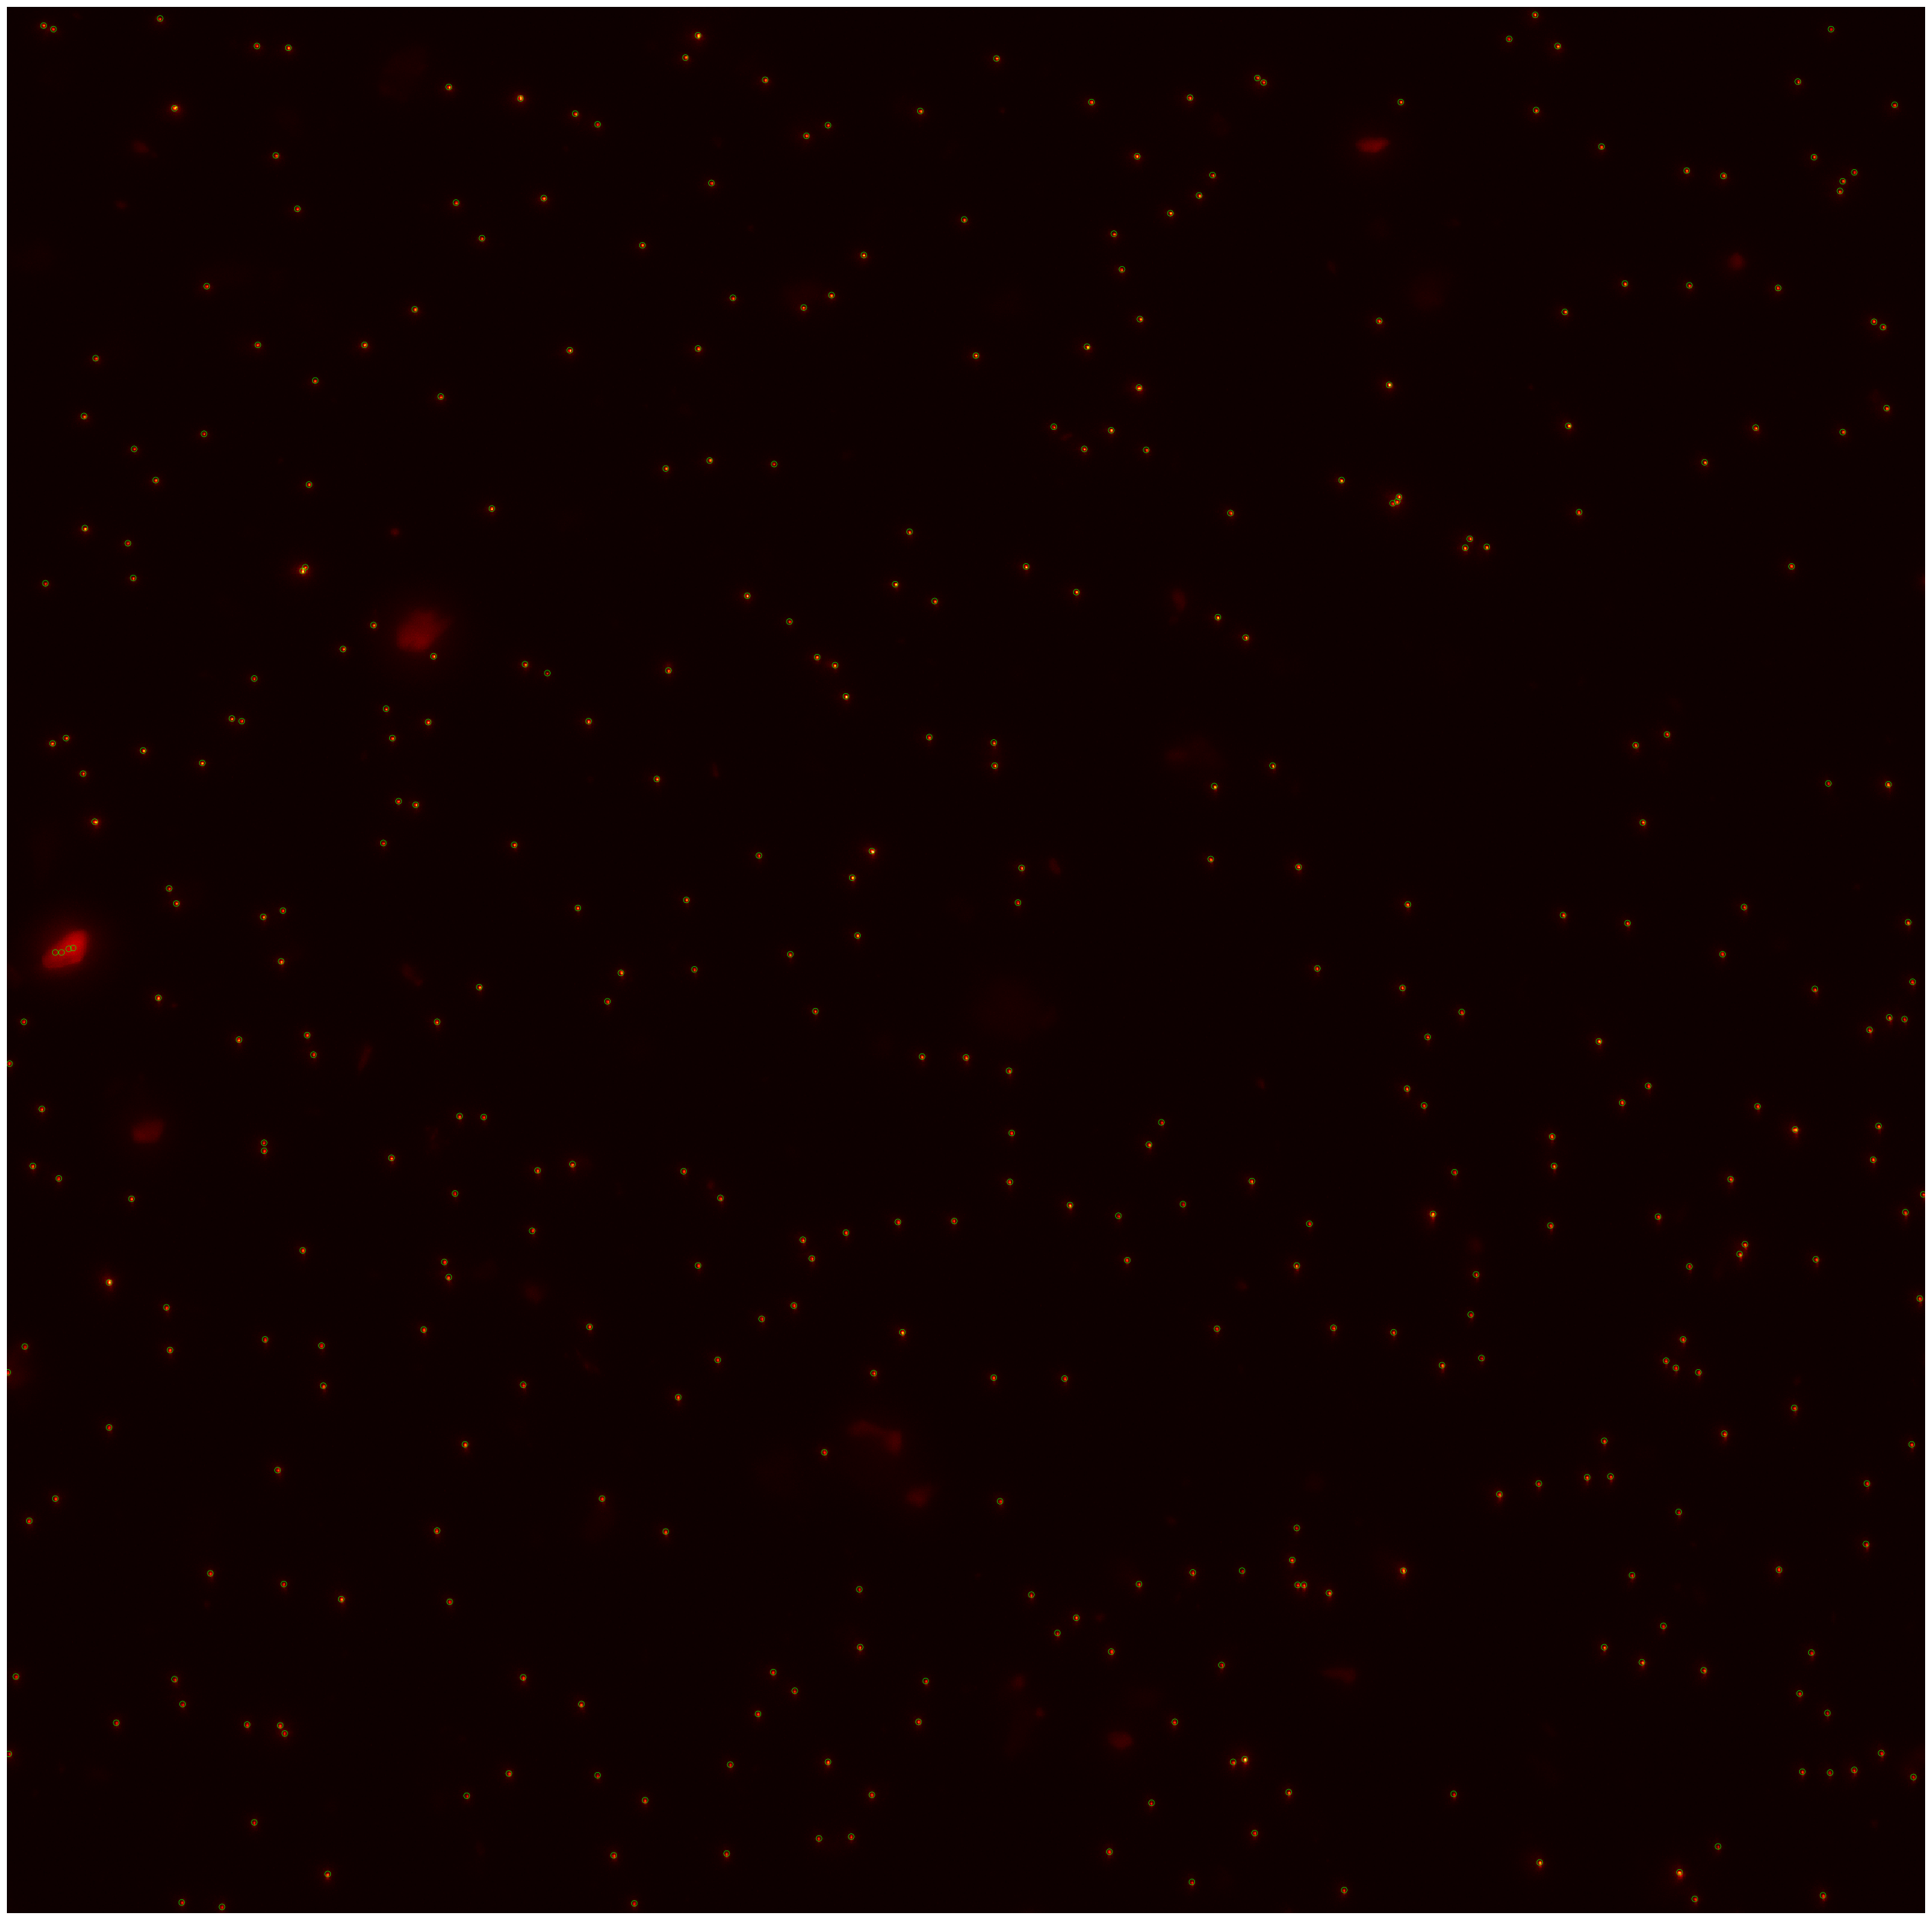

In [17]:
# Plot the identified peaks on the MIP image
for path in paths:
    img_path = os.path.join(path_input, path)
    tbl_path = os.path.join(path_output, path.replace(".ome.tiff", ".csv"))
    out_path = os.path.join(path_figures, path.replace(".ome.tiff", "-figure.png"))
        
    img = tifffile.imread(img_path)
    img = np.max(img, axis=0)
    
    data = pd.read_csv(tbl_path)
    data.rename(columns = {"1":"y", "2":"x"}, inplace = True)
    data.loc[:, "y"] = img.shape[0] - data.loc[:, "y"]
    plt.clf()
    plt.set_cmap('hot')
    f, ax = plt.subplots(figsize=(36, 36))
    ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]], aspect='auto')
    sns.scatterplot(x="x", y="y", facecolors = 'none', edgecolors = 'lime',
                data=data, ax=ax)
    ax.set_axis_off()
    f.savefig(out_path, bbox_inches='tight', pad_inches = 0)

In [21]:
# Calculate FWHM using scipy.signal.peak_widths (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html)
header = ["z_px", "y_px", "x_px", "z_nm", "y_nm", "x_nm", "fwhm_z_px", "fwhm_y_px", "fwhm_x_px", "fwhm_z_nm", "fwhm_y_nm", "fwhm_x_nm"]
for path in paths:
    img_path = os.path.join(path_input, path)
    tbl_path = os.path.join(path_output, path.replace(".ome.tiff", ".csv"))
    out_path = os.path.join(path_fwhm, path.replace(".ome.tiff", "-fwhm.csv"))
    if os.path.isfile(out_path):
        continue
    
    img = tifffile.imread(img_path)

    peaks = pd.read_csv(tbl_path)
    peaks = np.asarray(peaks)
    results = np.concatenate((peaks, np.full((peaks.shape[0], 9), -1.0)), axis = 1)
    for i,p in enumerate(peaks):
         results[i,6] = signal.peak_widths(img[: ,p[1], p[2]], np.full((1), p[0]), rel_height=0.5, prominence_data=None, wlen=None)[0]
         results[i,7] = signal.peak_widths(img[p[0], :, p[2]], np.full((1), p[1]), rel_height=0.5, prominence_data=None, wlen=None)[0]
         results[i,8] = signal.peak_widths(img[p[0], p[1], :], np.full((1), p[2]), rel_height=0.5, prominence_data=None, wlen=None)[0]
    results[:, 3] = results[:, 0] * PIXEL_SIZE[0]  # Peak coordinate Z
    results[:, 4] = results[:, 1] * PIXEL_SIZE[1]  # Peak coordinate Y 
    results[:, 5] = results[:, 2] * PIXEL_SIZE[2]  # Peak coordinate X
    results[:, 9] = results[:, 6] * PIXEL_SIZE[0]  # Peak FWHM Z
    results[:, 10] = results[:, 7] * PIXEL_SIZE[1] # Peak FWHM Y
    results[:, 11] = results[:, 8] * PIXEL_SIZE[2] # Peak FWHM X
    
    df = pd.DataFrame(results, columns=header)
    df.to_csv(path_or_buf = out_path, sep=',', na_rep='',
              float_format=None, columns=None, header=True, index=False)



/tmp/ipykernel_69365/1997631505.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[i,6] = signal.peak_widths(img[: ,p[1], p[2]], np.full((1), p[0]), rel_height=0.5, prominence_data=None, wlen=None)[0]
/tmp/ipykernel_69365/1997631505.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[i,7] = signal.peak_widths(img[p[0], :, p[2]], np.full((1), p[1]), rel_height=0.5, prominence_data=None, wlen=None)[0]
/tmp/ipykernel_69365/1997631505.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this 

In [22]:
# Plot the identified peaks on the image at each Z, show extra large peaks in cyan
for path in paths:
    img_path = os.path.join(path_input, path)
    tbl_path = os.path.join(path_fwhm, path.replace(".ome.tiff", "-fwhm.csv"))
    out_path = os.path.join(path_output, path.replace(".ome.tiff", ""))
    os.makedirs(out_path, mode=0o777, exist_ok=True)
        
    img = tifffile.imread(img_path)
    data = pd.read_csv(tbl_path)
    data.loc[:, "y_px"] = img.shape[1] - data.loc[:, "y_px"]
    data.z_px = data.z_px.astype(int)
    data["big"] = data['big'] = np.where(data['fwhm_y_px'] > 3.1, 'big', 'small')
    data["sizes"] = data.fwhm_y_px **2 *3.14 # Scale with peak area
    data.fwhm_y_px = data.fwhm_y_px.astype(int)
    color_map = {'small': 'lime', 'big': 'cyan'}
    data['color'] = data['big'].map(color_map)
        
    for cz in np.unique(data.z_px):
        zslice = data[data["z_px"] == cz]
        plt.clf()
        plt.set_cmap('hot')
        f, ax = plt.subplots(figsize=(36, 36))
        ax.imshow(img[cz,:,:], extent=[0, img.shape[2], 0, img.shape[1]], aspect='auto')
        ax.scatter(zslice.x_px, zslice.y_px, edgecolors=zslice.color, facecolors="none", label=zslice.big,
                  s = zslice.sizes, linewidths=0.25)
        ax.set_axis_off()
        Z_out_path = os.path.join(out_path, str(cz) + "-" + path.replace(".ome.tiff", "-figure.png"))
        f.savefig(Z_out_path, bbox_inches='tight', pad_inches = 0)
        plt.close()
        print((cz, img_path, tbl_path, out_path))

./output_MC/_LARGER_EXP-2_W0A1_P1X_R8_RO-Channel3a_22112024-01-50-48_s1
(8, './img_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', './fwhm_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1-fwhm.csv', './output_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1')
(9, './img_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', './fwhm_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1-fwhm.csv', './output_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1')
(10, './img_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', './fwhm_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1-fwhm.csv', './output_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1')
(11, './img_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.ome.tiff', './fwhm_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1-fwhm.csv', './output_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1')
(12, './img_MC/EXP-2_W0A1_P1X_R8_RO-Channel3_22112024-01-50-48_s1.

<Figure size 640x480 with 0 Axes>